# DATA SCIENCE PROJECT
### BIG MART SALES PREDICTION


#### Abstract
<p>The data scientists have collected sales data for around 1500 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this project is to build a predictive model and find out the sales of each product at a particular store. Using this machine learning model, the shopping chain will try to understand the properties of products and stores which play a key role in increasing sales.</p>

#### Team Members:

Hariharan Thiyagarajan,
Hima Swetha Gutti



In [1]:
import pandas as pd
import numpy as np
import sys

# Data Collection

In [2]:
df = pd.read_csv('resources/train.csv')
df2=pd.read_csv('resources/test.csv')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


# Data Preprocessing

In [5]:
df['source'] = 'train'
df2['source']= 'test'

In [6]:
dataset = pd.concat([df, df2], ignore_index=True,sort=True)
dataset.head()


,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train


In [73]:
dataset.to_csv('resources/result.csv', index=False)

In [8]:
dataset.describe() 

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


# Data Cleaning

In [9]:
dataset.nunique()

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3493
Item_Type                       16
Item_Visibility              13006
Item_Weight                    415
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      3
Outlet_Type                      4
source                           2
dtype: int64

In [10]:
dataset.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [11]:
#filling na with blanks
dataset['Outlet_Size'] = dataset['Outlet_Size'].fillna("")

In [12]:
#Filling the missing values of Item weight and outlet Sales with mean of a particular item
label=set(dataset['Item_Identifier'])
for item in label:
    dataset.loc[(dataset["Item_Identifier"]==item) & (dataset["Item_Weight"].isnull()),"Item_Weight"] = dataset.loc[dataset["Item_Identifier"]==item,"Item_Weight"].mean()


In [13]:
dataset.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                     0
Outlet_Type                     0
source                          0
dtype: int64

In [14]:
dataset['Item_visibility_mean_ratio'] = dataset['Item_Visibility']

In [15]:
#Replacing 0 with mean
for item in label:
    item_mean=dataset.loc[dataset["Item_Identifier"]==item,"Item_visibility_mean_ratio"].mean()
    dataset.loc[dataset["Item_Identifier"]==item,"Item_visibility_mean_ratio"]=dataset.loc[dataset["Item_Identifier"]==item,"Item_visibility_mean_ratio"].replace(0,item_mean)
    dataset.loc[dataset["Item_Identifier"]==item,"Item_visibility_mean_ratio"]=dataset.loc[dataset["Item_Identifier"]==item,"Item_visibility_mean_ratio"]/item_mean
    

In [16]:
dataset['Item_visibility_mean_ratio'].describe()

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_visibility_mean_ratio, dtype: float64

In [17]:
#Mapping Identifier to its related category
dataset['Item_type_generalize'] = dataset['Item_Identifier'].apply(lambda x: x[0:2])
dataset['Item_type_generalize'] = dataset['Item_type_generalize'].map({'FD': 'Food',
                                                                       'NC': 'Non-Consumable',
                                                                       'DR': 'Drinks'})

In [18]:
#Modifying Item fat content
dataset['Item_Fat_Content'] = dataset['Item_Fat_Content'].replace({'LF': 'Low Fat',
                                                                       'reg': 'Regular',
                                                                       'low fat': 'Low Fat'})

In [19]:
dataset['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [20]:
dataset['Item_type_generalize'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_type_generalize, dtype: int64

In [21]:
#Replacing Non consumable fat content to Non edible
dataset.loc[dataset['Item_type_generalize'] == 'Non-Consumable', 'Item_Fat_Content'] = 'Non-Consumable'

In [22]:
dataset['Item_Fat_Content'].value_counts()

Low Fat           6499
Regular           5019
Non-Consumable    2686
Name: Item_Fat_Content, dtype: int64

In [23]:
#Calculating Outlet age
import datetime
d = datetime.datetime.today()
dataset['Outlet_year'] =  2013-dataset['Outlet_Establishment_Year'] 

In [24]:
dataset.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_visibility_mean_ratio,Item_type_generalize,Outlet_year
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,0.931078,Food,14
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,0.933420,Drinks,4
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,0.960069,Food,14
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,,Grocery Store,train,1.000000,Food,15
4,Non-Consumable,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,1.000000,Non-Consumable,26


# Exploratory Data Analysis

#### Data Visualization

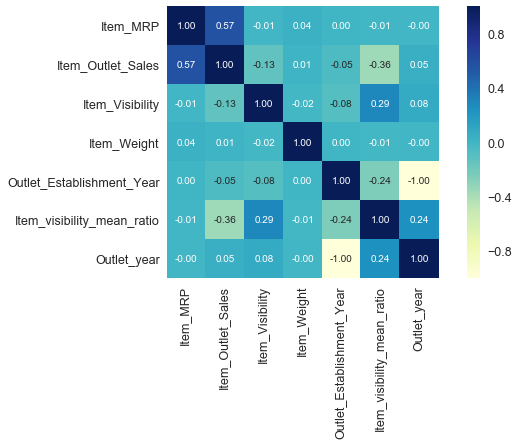

In [26]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
corr_data=dataset.corr()

sns.set(font_scale=1.25)
plt.figure(figsize=(10,5))
hm = sns.heatmap(corr_data, cbar=True, annot=True, square=True,cmap="YlGnBu",
                 fmt='.2f', annot_kws={'size': 10},
                 yticklabels=list(corr_data.columns), xticklabels=list(corr_data.columns))
plt.show()


In [27]:
#Outlet Identifier is the store number /name so changed it also to numeric
#Creating dummies for selected cateogrical data to change it to numberic
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset['Outlet']=le.fit_transform(dataset['Outlet_Identifier'])
var_mod=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_type_generalize','Outlet_Type','Outlet']
for i in var_mod:
    dataset[i]=le.fit_transform(dataset[i])

dataset=pd.get_dummies(dataset,columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_type_generalize','Outlet_Type','Outlet'])



In [28]:
dataset.dtypes

Item_Identifier                object
Item_MRP                      float64
Item_Outlet_Sales             float64
Item_Type                      object
Item_Visibility               float64
Item_Weight                   float64
Outlet_Establishment_Year       int64
Outlet_Identifier              object
source                         object
Item_visibility_mean_ratio    float64
Outlet_year                     int64
Item_Fat_Content_0              uint8
Item_Fat_Content_1              uint8
Item_Fat_Content_2              uint8
Outlet_Location_Type_0          uint8
Outlet_Location_Type_1          uint8
Outlet_Location_Type_2          uint8
Outlet_Size_0                   uint8
Outlet_Size_1                   uint8
Outlet_Size_2                   uint8
Outlet_Size_3                   uint8
Item_type_generalize_0          uint8
Item_type_generalize_1          uint8
Item_type_generalize_2          uint8
Outlet_Type_0                   uint8
Outlet_Type_1                   uint8
Outlet_Type_

In [29]:
#find unique outlet identifier
dataset['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

#### Data Visualization for sales in all stores

Text(0,0.5,'Item Outlet Sales')

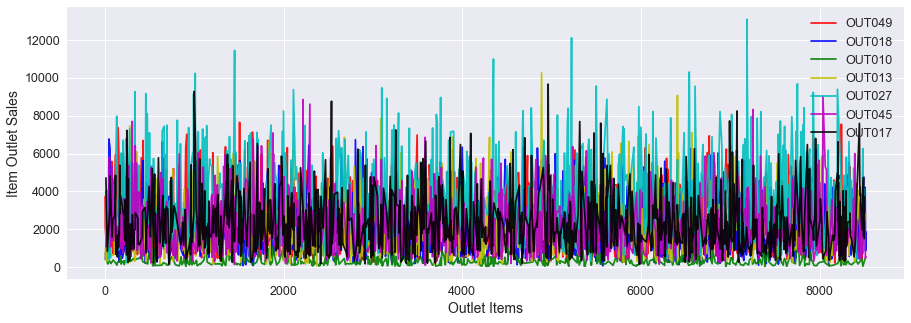

In [30]:
colors = ['r', 'b', 'g', 'y', 'c', 'm', 'k']

for i, s in enumerate(dataset.Outlet_Identifier.unique()[:7]):
    dataset[dataset['Outlet_Identifier'] == s].Item_Outlet_Sales.plot(c=colors[i], figsize=(15, 5), label=s, alpha=.9)
plt.legend(loc='best');
plt.xlabel('Outlet Items', fontsize=14)
plt.ylabel('Item Outlet Sales', fontsize=14)

In [31]:
#get the sale data of each store in different variables
'''
['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019']
'''
data_OUT049 = dataset[dataset['Outlet_Identifier'] == 'OUT049']
data_OUT018 = dataset[dataset['Outlet_Identifier'] == 'OUT018']
data_OUT010 = dataset[dataset['Outlet_Identifier'] == 'OUT010']
data_OUT013 = dataset[dataset['Outlet_Identifier'] == 'OUT013']
data_OUT027 = dataset[dataset['Outlet_Identifier'] == 'OUT027']
data_OUT045 = dataset[dataset['Outlet_Identifier'] == 'OUT045']
data_OUT017 = dataset[dataset['Outlet_Identifier'] == 'OUT017']
data_OUT046 = dataset[dataset['Outlet_Identifier'] == 'OUT046']
data_OUT035 = dataset[dataset['Outlet_Identifier'] == 'OUT035']
data_OUT019 = dataset[dataset['Outlet_Identifier'] == 'OUT019']

### Analysis Of Sales vs Item Type using Violin Plot

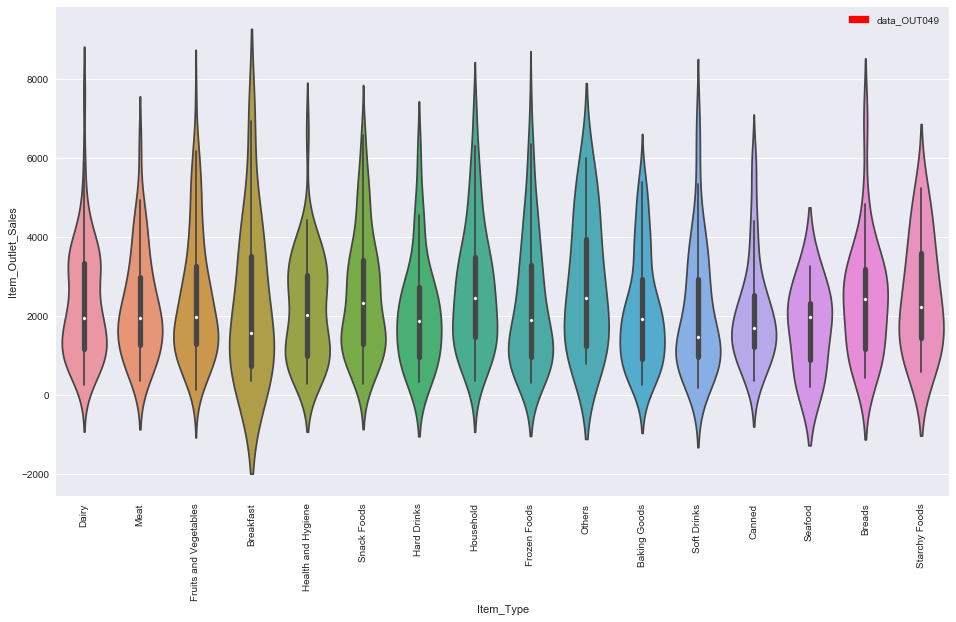

In [32]:
sns.set(rc={'figure.figsize':(16,9)})
sns.violinplot(x='Item_Type', y='Item_Outlet_Sales', scale_hue=True, data=data_OUT049, scale="width", height=20)
red_patch = mpatches.Patch(color='red', label='data_OUT049')
plt.legend(handles=[red_patch])
plt.xticks(rotation=90)
plt.show()

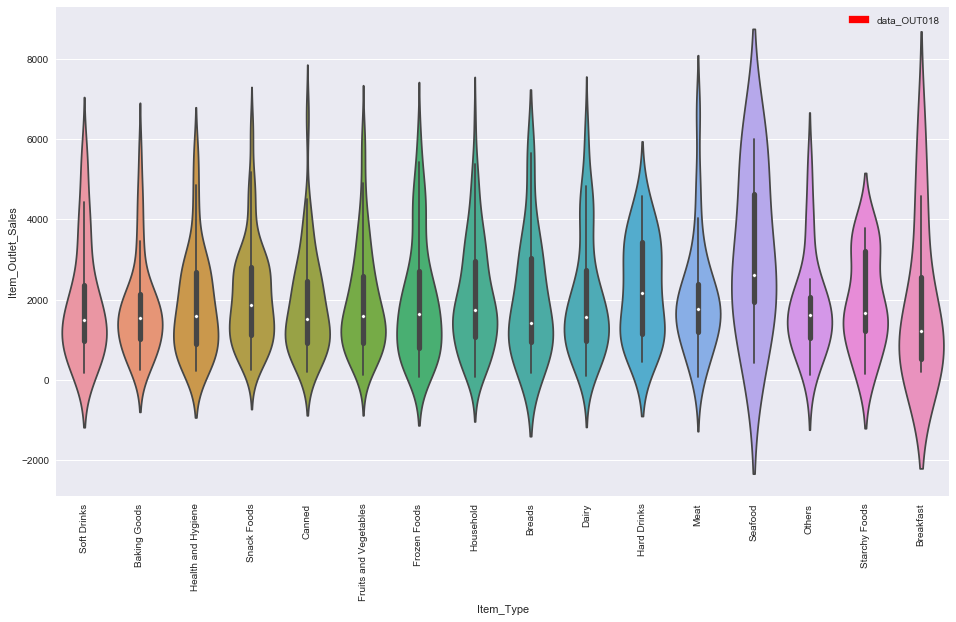

In [33]:
sns.set(rc={'figure.figsize':(16,9)})
sns.violinplot(x='Item_Type', y='Item_Outlet_Sales', scale_hue=True, data=data_OUT018, scale="width", height=20)
red_patch = mpatches.Patch(color='red', label='data_OUT018')
plt.legend(handles=[red_patch])
plt.xticks(rotation=90)
plt.show()

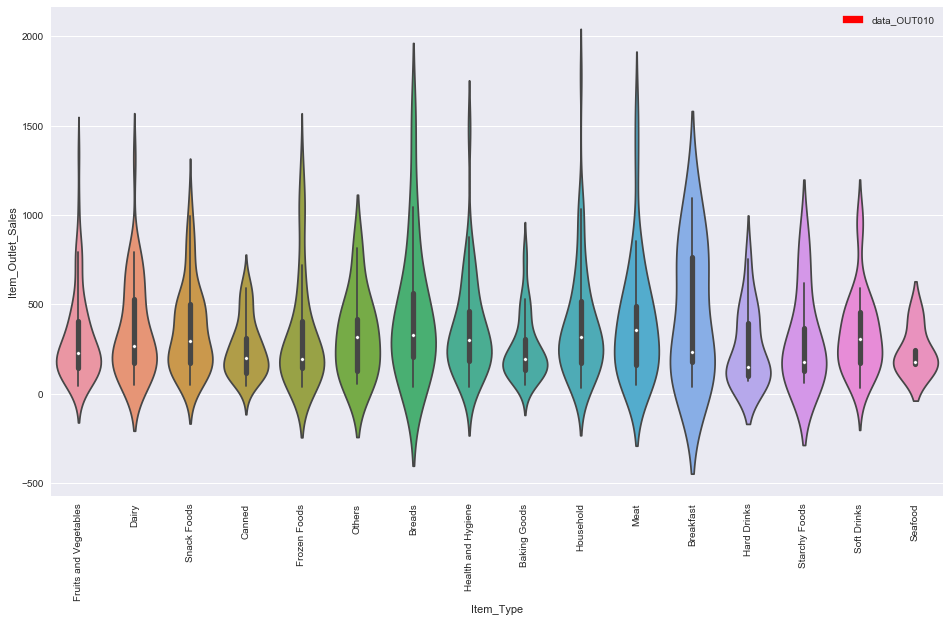

In [35]:
sns.set(rc={'figure.figsize':(16,9)})
sns.violinplot(x='Item_Type', y='Item_Outlet_Sales', scale_hue=True, data=data_OUT010, scale="width", height=20)
red_patch = mpatches.Patch(color='red', label='data_OUT010')
plt.legend(handles=[red_patch])
plt.xticks(rotation=90)
plt.show()

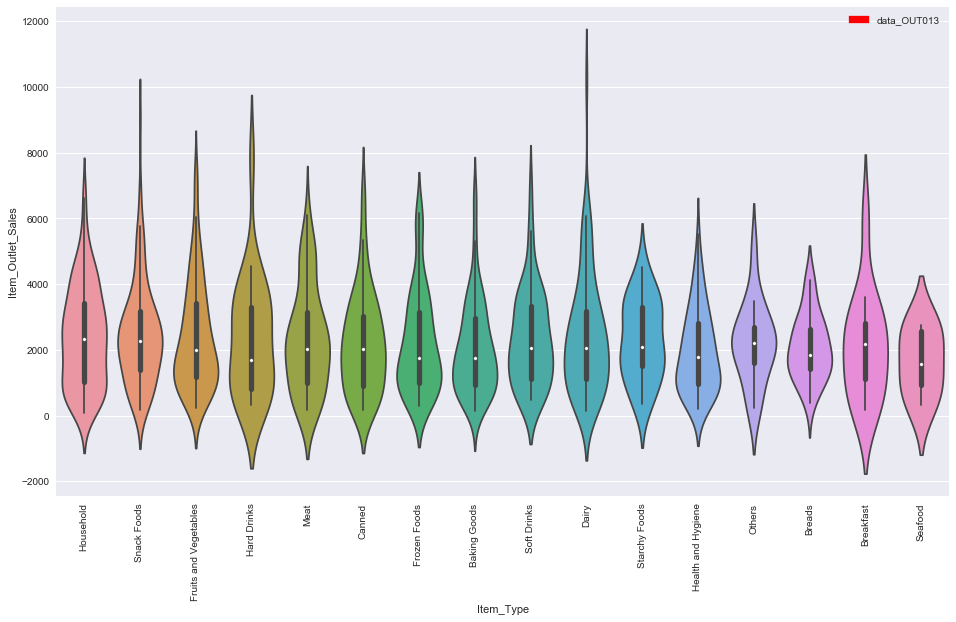

In [36]:
sns.set(rc={'figure.figsize':(16,9)})
sns.violinplot(x='Item_Type', y='Item_Outlet_Sales', scale_hue=True, data=data_OUT013, scale="width", height=20)
red_patch = mpatches.Patch(color='red', label='data_OUT013')
plt.legend(handles=[red_patch])
plt.xticks(rotation=90)
plt.show()

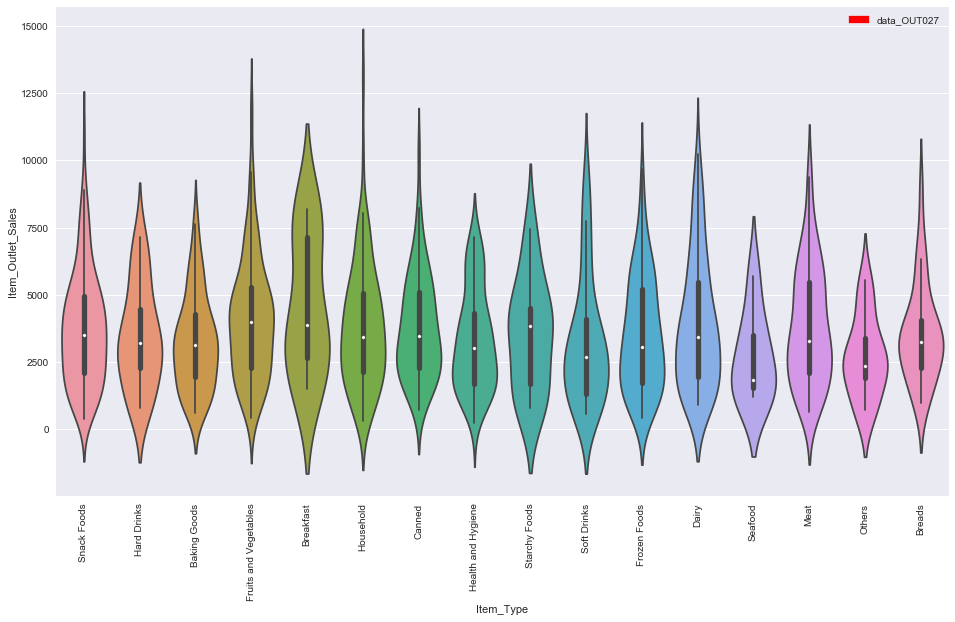

In [37]:
sns.set(rc={'figure.figsize':(16,9)})
sns.violinplot(x='Item_Type', y='Item_Outlet_Sales', scale_hue=True, data=data_OUT027, scale="width", height=20)
red_patch = mpatches.Patch(color='red', label='data_OUT027')
plt.legend(handles=[red_patch])
plt.xticks(rotation=90)
plt.show()

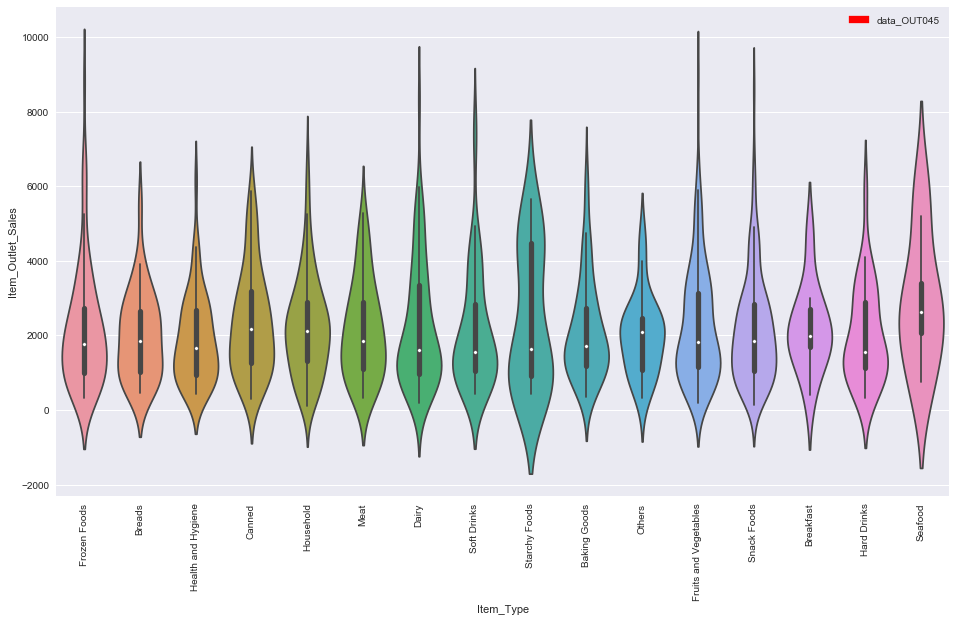

In [38]:
sns.set(rc={'figure.figsize':(16,9)})
sns.violinplot(x='Item_Type', y='Item_Outlet_Sales', scale_hue=True, data=data_OUT045, scale="width", height=20)
red_patch = mpatches.Patch(color='red', label='data_OUT045')
plt.legend(handles=[red_patch])
plt.xticks(rotation=90)
plt.show()

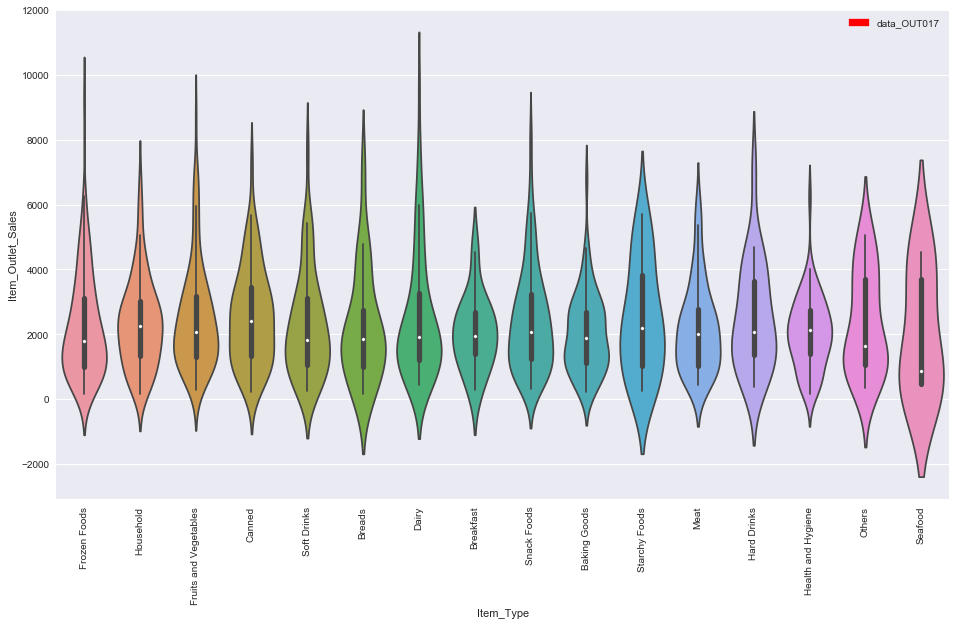

In [39]:
sns.set(rc={'figure.figsize':(16,9)})
sns.violinplot(x='Item_Type', y='Item_Outlet_Sales', scale_hue=True, data=data_OUT017, scale="width", height=20)
red_patch = mpatches.Patch(color='red', label='data_OUT017')
plt.legend(handles=[red_patch])
plt.xticks(rotation=90)
plt.show()

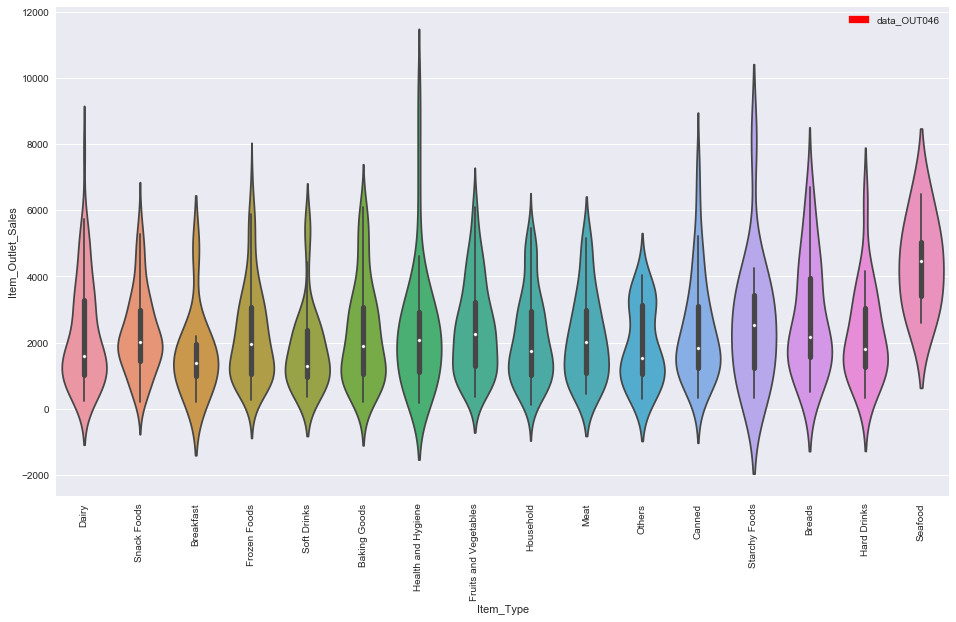

In [40]:
sns.set(rc={'figure.figsize':(16,9)})
sns.violinplot(x='Item_Type', y='Item_Outlet_Sales', scale_hue=True, data=data_OUT046, scale="width", height=20)
red_patch = mpatches.Patch(color='red', label='data_OUT046')
plt.legend(handles=[red_patch])
plt.xticks(rotation=90)
plt.show()

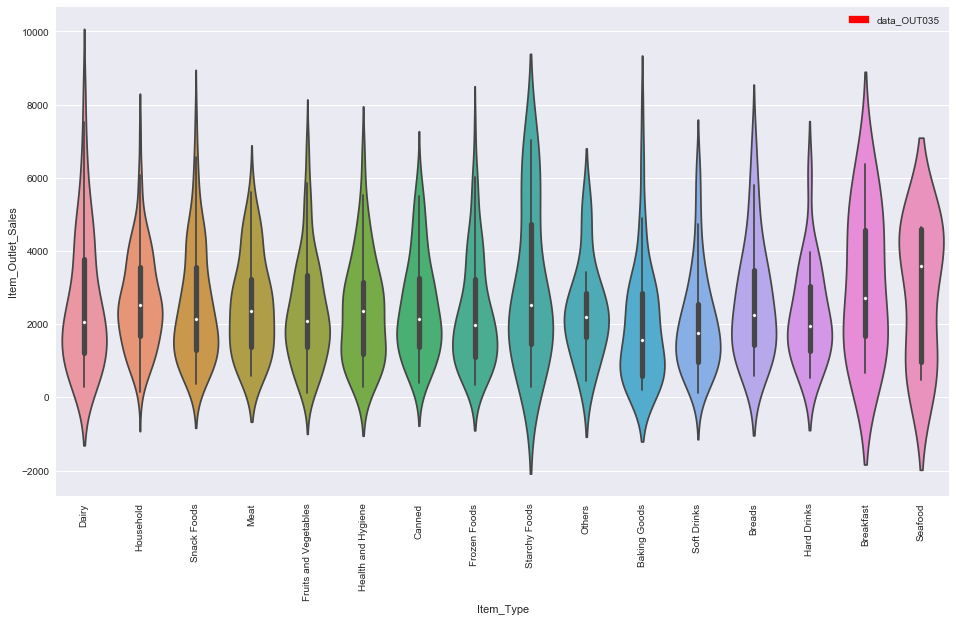

In [41]:
sns.set(rc={'figure.figsize':(16,9)})
sns.violinplot(x='Item_Type', y='Item_Outlet_Sales', scale_hue=True, data=data_OUT035, scale="width", height=20)
red_patch = mpatches.Patch(color='red', label='data_OUT035')
plt.xticks(rotation=90)
plt.legend(handles=[red_patch])
plt.show()

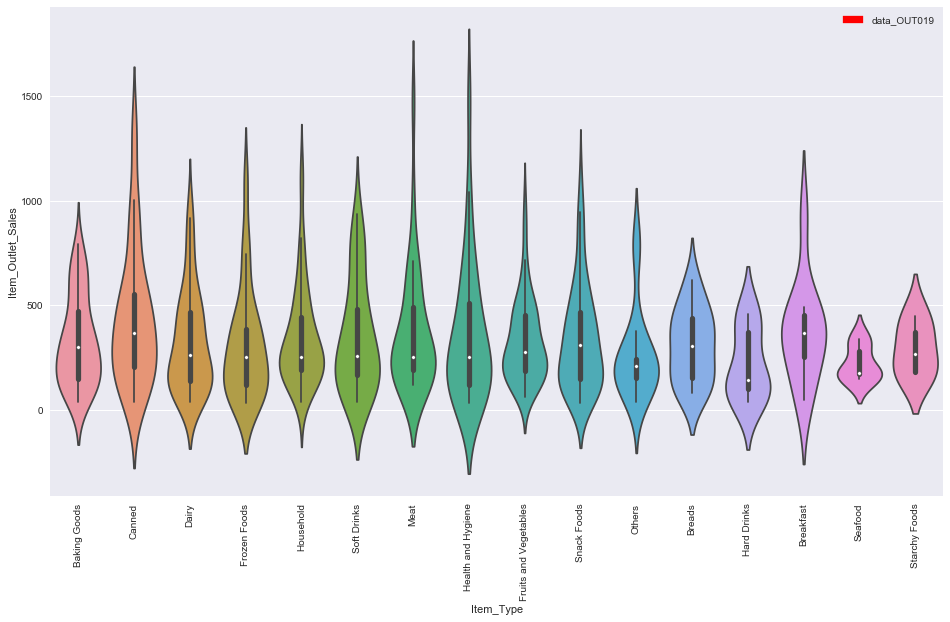

In [42]:
sns.set(rc={'figure.figsize':(16,9)})
sns.violinplot(x='Item_Type', y='Item_Outlet_Sales', scale_hue=True, data=data_OUT019, scale="width", height=20)
plt.xticks(rotation=90)
red_patch = mpatches.Patch(color='red', label='data_OUT019')
plt.legend(handles=[red_patch])
plt.show()

#### Analysis Of Sales vs Item Visibility

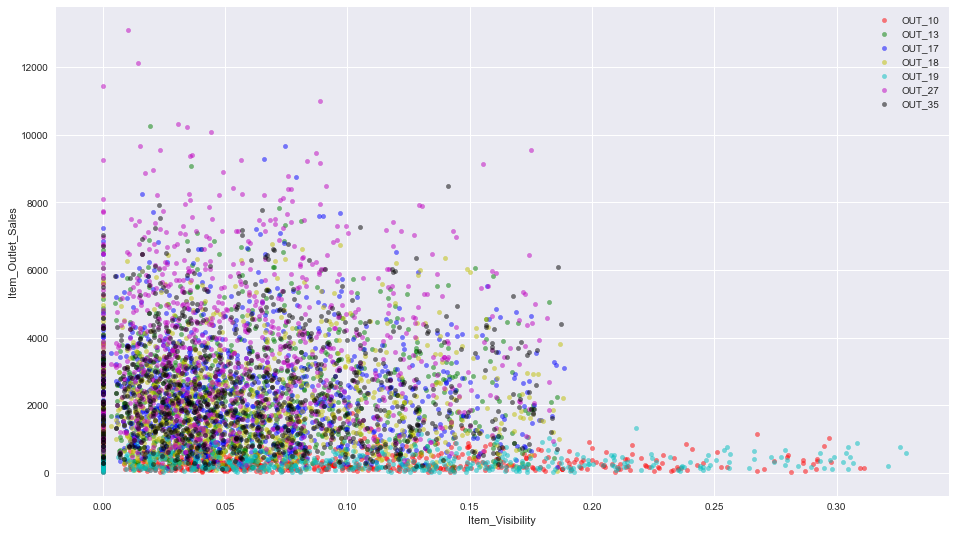

In [43]:
ax = data_OUT010.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='r', alpha=0.5, label='OUT_10', figsize=(16,9))
data_OUT013.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='g', ax=ax, alpha=0.5, label='OUT_13')
data_OUT017.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='b', ax=ax, alpha=0.5, label='OUT_17')
data_OUT018.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='y', ax=ax, alpha=0.5, label='OUT_18')
data_OUT019.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='c', ax=ax, alpha=0.5, label='OUT_19')
data_OUT027.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='m', ax=ax, alpha=0.5, label='OUT_27')
data_OUT035.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='k', ax=ax, alpha=0.5, label='OUT_35')
plt.legend(loc='best');

### Analysis Of All Store Sales vs MRP

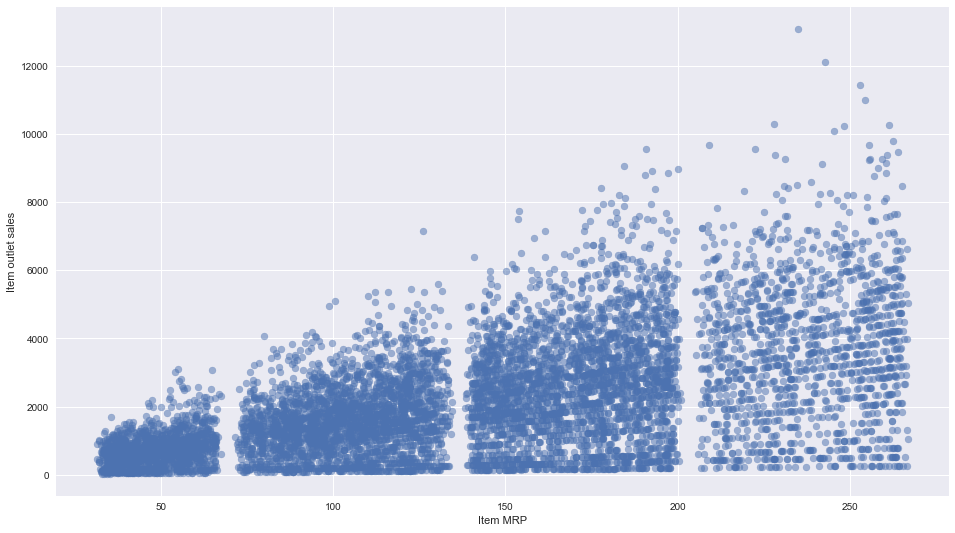

In [44]:

plt.scatter(dataset.Item_MRP, dataset.Item_Outlet_Sales, alpha = 0.5)

plt.xlabel("Item MRP")
plt.ylabel("Item outlet sales")
plt.show()

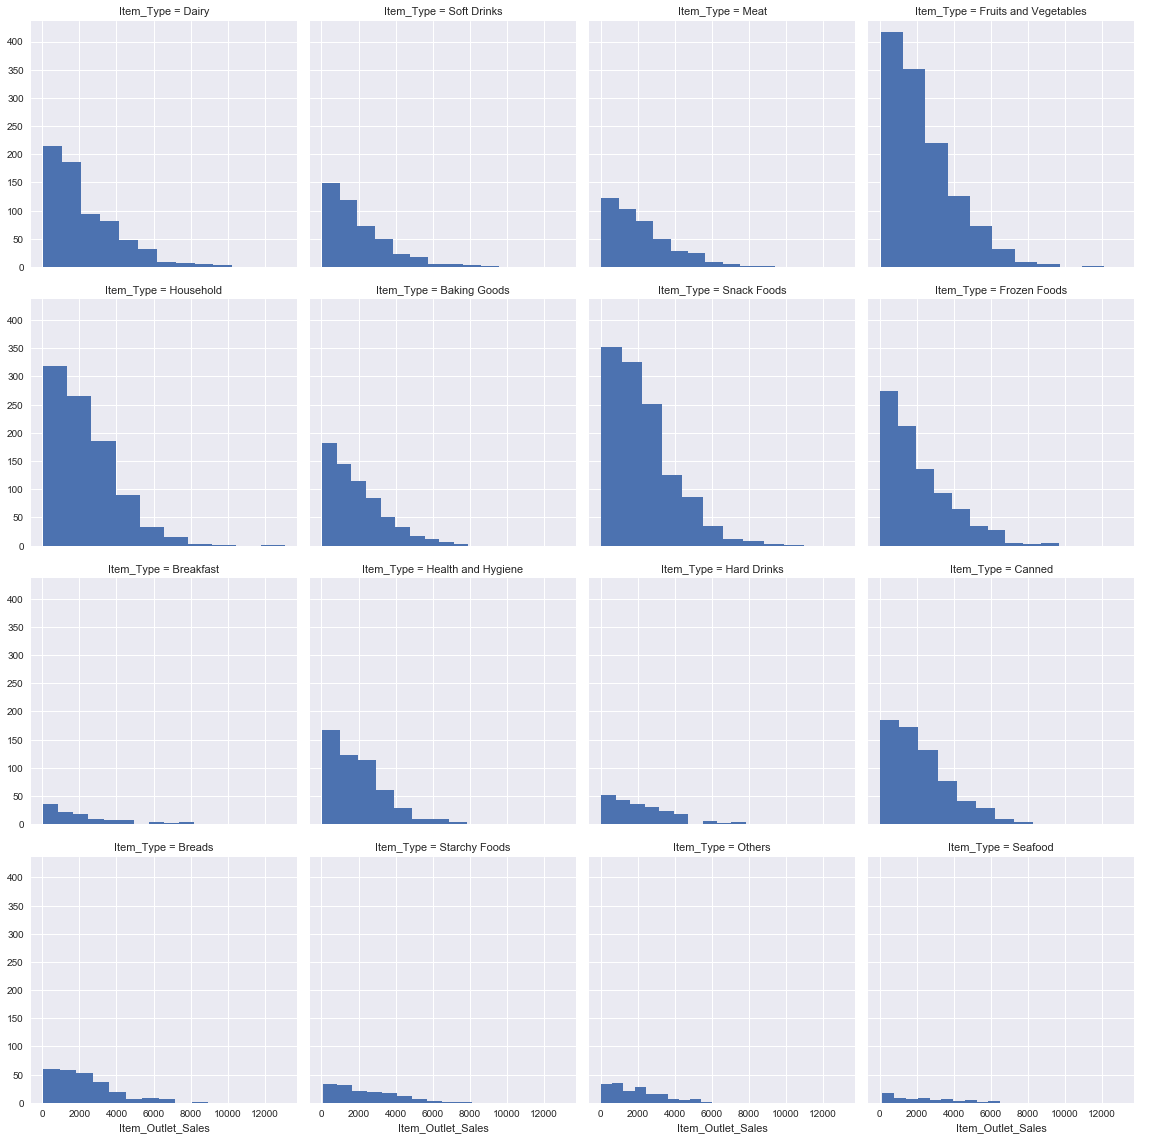

In [45]:
sns.FacetGrid(dataset, col='Item_Type', size=4, col_wrap=4) \
    .map(plt.hist, 'Item_Outlet_Sales') \
    .add_legend();

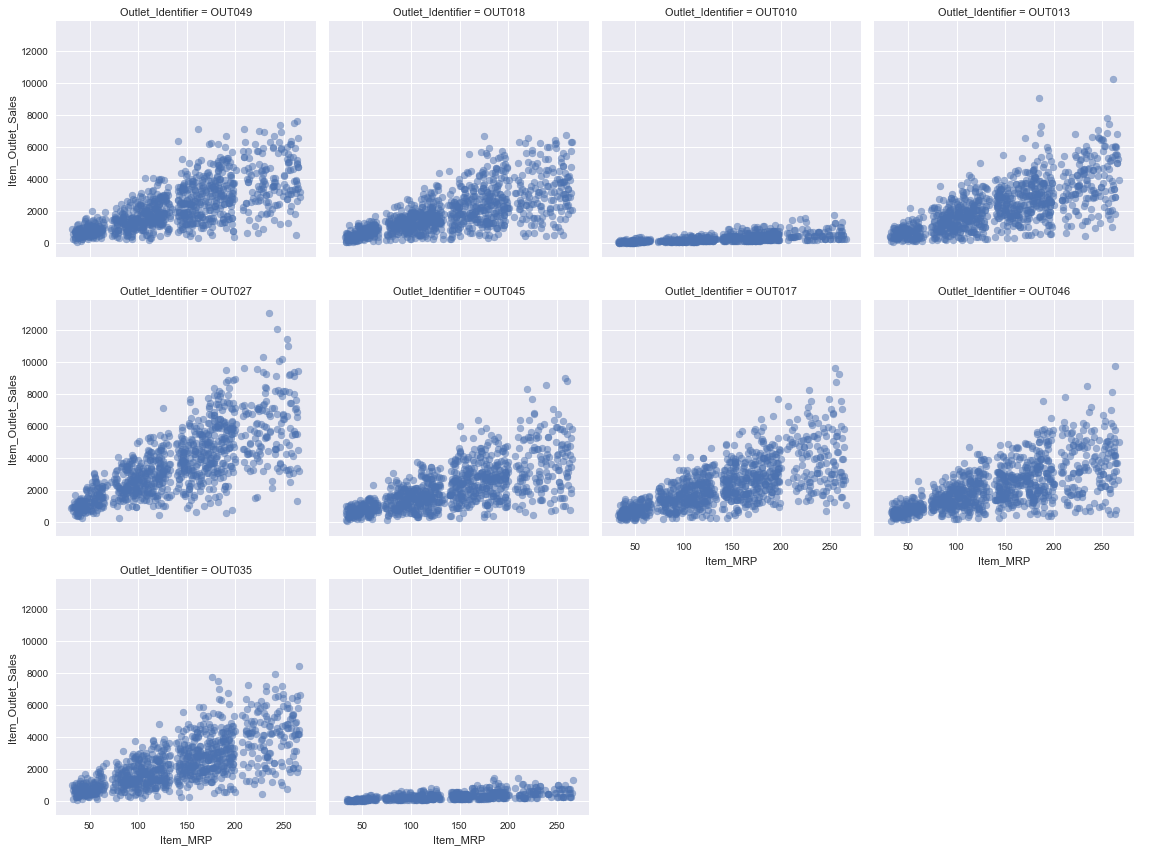

In [46]:
sns.FacetGrid(dataset, col='Outlet_Identifier', col_wrap=4, size=4) \
    .map(plt.scatter, 'Item_MRP', 'Item_Outlet_Sales',  alpha=0.5) \
    .add_legend();

# MODEL

In [47]:
dataset.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,source,Item_visibility_mean_ratio,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,train,0.931078,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,train,0.933420,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,train,0.960069,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,train,1.000000,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,train,1.000000,...,0,1,0,0,0,0,0,0,0,0


In [48]:
del dataset['Item_Type']

In [49]:
traindata = dataset.loc[dataset['source']=='train']
testdata = dataset.loc[dataset['source']=='test']

In [50]:
traindata.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,source,Item_visibility_mean_ratio,Outlet_year,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,249.8092,3735.1380,0.016047,9.30,1999,OUT049,train,0.931078,14,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,0.019278,5.92,2009,OUT018,train,0.933420,4,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,0.016760,17.50,1999,OUT049,train,0.960069,14,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,0.000000,19.20,1998,OUT010,train,1.000000,15,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,0.000000,8.93,1987,OUT013,train,1.000000,26,...,0,1,0,0,0,0,0,0,0,0


In [51]:
testdata.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,source,Item_visibility_mean_ratio,Outlet_year,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
8523,FDW58,107.8622,NaN,0.007565,20.750,1999,OUT049,test,1.029192,14,...,0,0,0,0,0,0,0,0,0,1
8524,FDW14,87.3198,NaN,0.038428,8.300,2007,OUT017,test,1.130311,6,...,0,0,1,0,0,0,0,0,0,0
8525,NCN55,241.7538,NaN,0.099575,14.600,1998,OUT010,test,1.735215,15,...,1,0,0,0,0,0,0,0,0,0
8526,FDQ58,155.0340,NaN,0.015388,7.315,2007,OUT017,test,1.291577,6,...,0,0,1,0,0,0,0,0,0,0
8527,FDY38,234.2300,NaN,0.118599,13.600,1985,OUT027,test,0.917824,28,...,0,0,0,0,0,1,0,0,0,0


In [52]:
del traindata['source']
del testdata['source']
del testdata['Item_Outlet_Sales']

### Linear Regression

In [53]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import explained_variance_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [54]:



x_cols =['Item_MRP','Item_Weight','Outlet_Establishment_Year', 'Item_Fat_Content_0',
       'Item_Fat_Content_1', 'Item_Fat_Content_2', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Size_3',
       'Item_type_generalize_0', 'Item_type_generalize_1',
       'Item_type_generalize_2', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3', 'Outlet_0', 'Outlet_1', 'Outlet_2',
       'Outlet_3', 'Outlet_4', 'Outlet_5', 'Outlet_6', 'Outlet_7', 'Outlet_8',
       'Outlet_9']
X = traindata[x_cols]
Y = traindata['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, Y ,test_size=0.2)

In [55]:
reg= LinearRegression(normalize=True)
reg.fit(X_train,y_train)
Linearreg_predictions = reg.predict(X_test)
reg.score(X_test,y_test)

0.5719562501011732

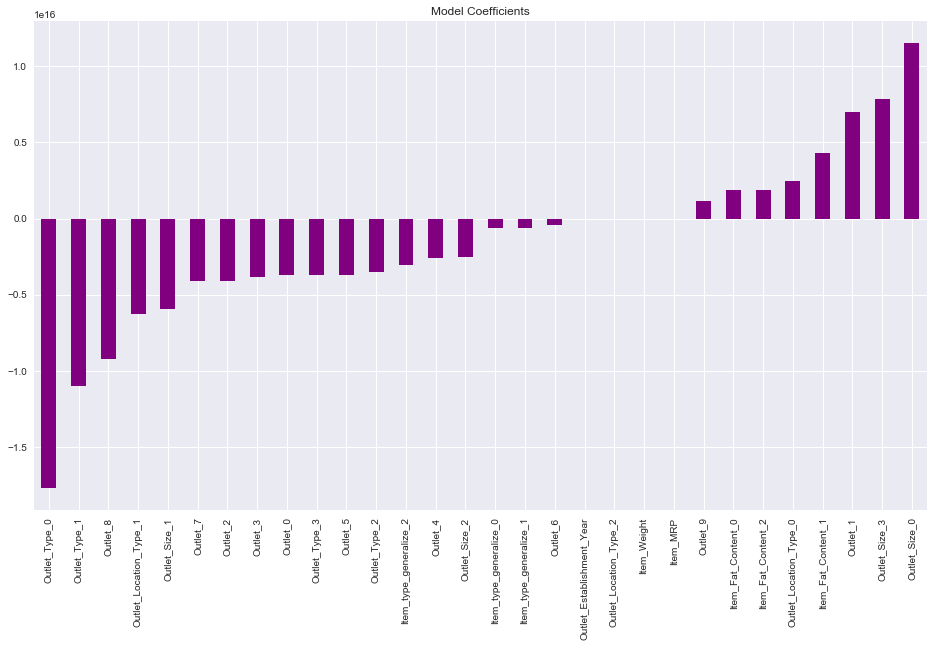

In [56]:
coef1 = pd.Series(reg.coef_, x_cols).sort_values()
coef1.plot(kind='bar', color="purple", title='Model Coefficients',figsize=(16,9))

In [57]:
#performs cross validation
cv_score = cross_val_score(reg,X,Y,cv=20,scoring='neg_mean_squared_error')
cv_score=np.sqrt(np.abs(cv_score))

In [58]:
cv_score

array([1208.60369618, 1115.28539886, 1137.7490572 , 1146.08314035,
       1139.80574657, 1105.64285497, 1080.48782787, 1368.92414227,
       1130.86449798, 1108.37867323, 1083.71061467, 1132.1801596 ,
       1150.93983916, 1073.14494112, 1079.11706165, 1188.31871651,
       1192.55508638, 1079.39982208, 1208.49633285, 1076.37296675])

In [59]:
#Print model report
print( "\nResults of Linear Regression model :")
print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(Linearreg_predictions,y_test)))
print( "CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g"%(np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))



Results of Linear Regression model :
RMSE : 1119
CV Score : Mean - 1140 | Std - 68.05 | Min - 1073 | Max - 1369


### Xgboost

In [60]:
from sklearn import tree, linear_model
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, mean_squared_error

In [61]:
xgb = xgboost.XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.08, max_delta_step=0, max_depth=7,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.75)

In [62]:
traindf, testdf = train_test_split(X_train, test_size = 0.3)
xgb.fit(X_train,y_train)

/Users/swetha/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.08, max_delta_step=0, max_depth=7,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=-1, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=0.75)

In [63]:
predictions = xgb.predict(X_test)
#performs cross validation
cv_score = cross_val_score(xgb,X,Y,cv=20,scoring='neg_mean_squared_error')
cv_score=np.sqrt(np.abs(cv_score))


/Users/swetha/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/swetha/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/swetha/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/swetha/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/swetha/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base',

In [64]:
print( "\nResults of XGBOOST model :")
print("RMSE : %.4g" % np.sqrt(mean_squared_error(predictions,y_test)))
print( "CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g"%(np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))



Results of XGBOOST model :
RMSE : 1114
CV Score : Mean - 1115 | Std - 45.35 | Min - 1036 | Max - 1196


### Decision Tree

In [65]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz

In [66]:
train_mse_array = []
test_mse_array = []
depths = list(range(1, 20))
for depth in depths:
    regr = DecisionTreeRegressor(max_depth= depth)
    regr.fit(X_train, y_train)
    y_predict = regr.predict(X_train)
    train_mse_array.append(np.sqrt(mean_squared_error(y_predict,y_train)))
    y_predict = regr.predict(X_test)
    test_mse_array.append(np.sqrt(mean_squared_error(y_predict,y_test)))

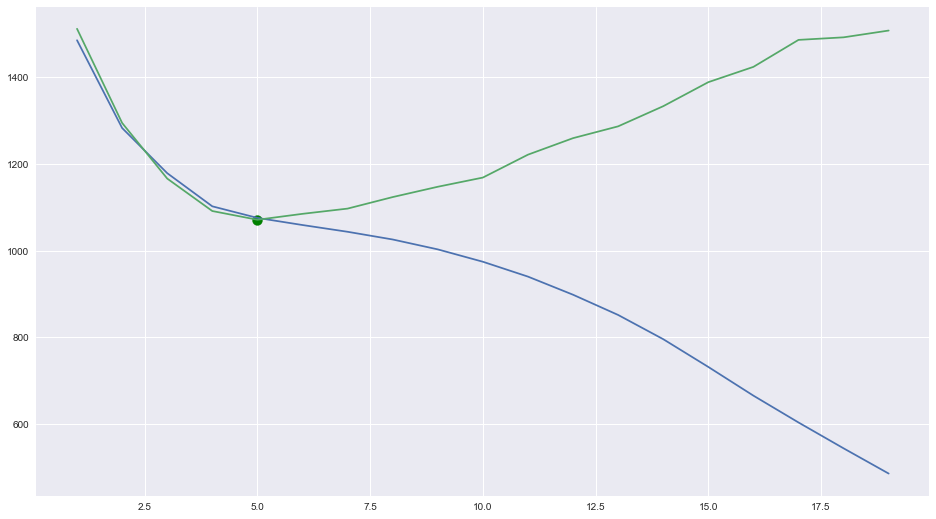

In [67]:
plt.plot(depths, train_mse_array)
plt.plot(depths, test_mse_array)
plt.scatter(depths[np.argmin(test_mse_array)], min(test_mse_array), marker='o', color = 'green',s=100)

In [68]:
print("depth for which the error is low",depths[np.argmin(test_mse_array)])


depth for which the error is low 5


In [69]:
regr = DecisionTreeRegressor(max_depth= depths[np.argmin(test_mse_array)])
regr.fit(X_train, y_train)
y = regr.predict(X_test)
test_mse_array.append(np.sqrt(mean_squared_error(y,y_test)))

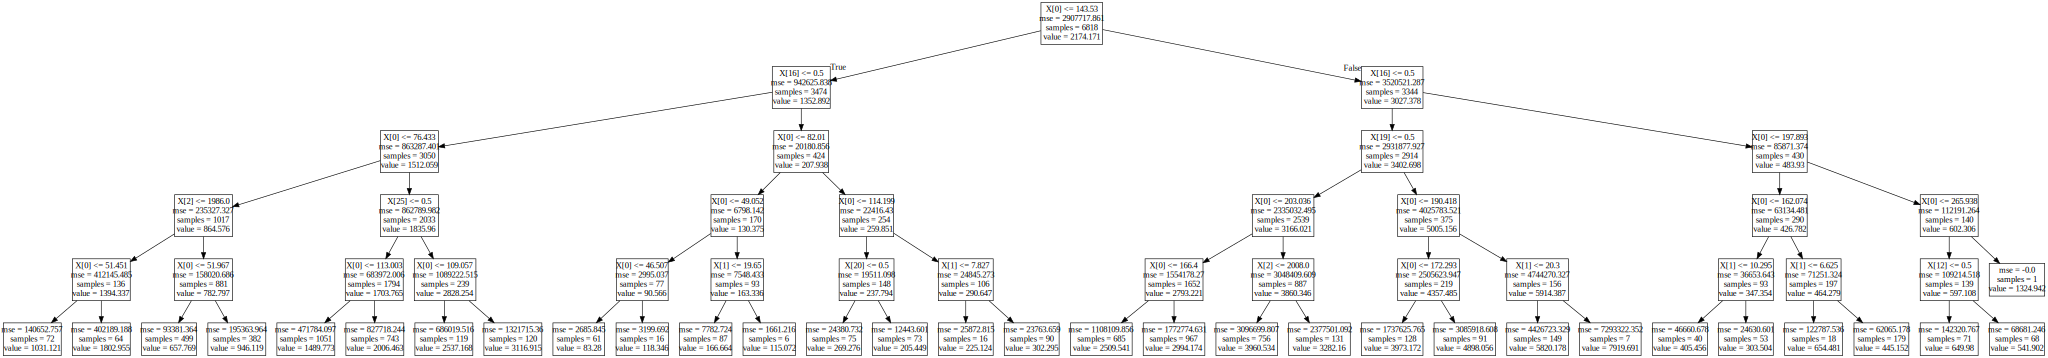

In [70]:
import graphviz
dot_data = export_graphviz(regr, out_file= None)
graph = graphviz.Source(dot_data)
graph

In [71]:

graph.render("tree")

'tree.pdf'

In [72]:

cv_score = cross_val_score(regr,X,Y,cv=20,scoring='neg_mean_squared_error')
cv_score=np.sqrt(np.abs(cv_score))
print( "\nResults of Decision tree model :")
print("RMSE : %.4g" % min(test_mse_array))
print( "CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g"%(np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))


Results of Decision tree model :
RMSE : 1071
CV Score : Mean - 1091 | Std - 46.81 | Min - 1010 | Max - 1171


# Conclusion: 

RMSE is less for decision tree when compared to the remaining models i.e Linear regression and XGBOOST.
